In [1]:
import sys
sys.path.append("..")

from generators.evaluation_fig_generator_lite import EvaluationFigureGeneratorLite

evaluation_day_list = ["tuesday", "wednesday", "friday"]
figure_save_base_path = "../../evaluation/"
index_evaluation_file_path_list = []
final_evaluation_file_path_list = []
for day in evaluation_day_list:
    index_evaluation_file_path = f"../../evaluation/{day}/{day}_csv.csv"
    final_evaluation_file_path = f"../../evaluation/{day}/{day}_final_result.csv"
    index_evaluation_file_path_list.append(index_evaluation_file_path)
    final_evaluation_file_path_list.append(final_evaluation_file_path)

evaluation_fig_gen = EvaluationFigureGeneratorLite(final_file_path_list=final_evaluation_file_path_list, index_file_path_list=index_evaluation_file_path_list, fig_save_base_path=figure_save_base_path, day_list=evaluation_day_list)


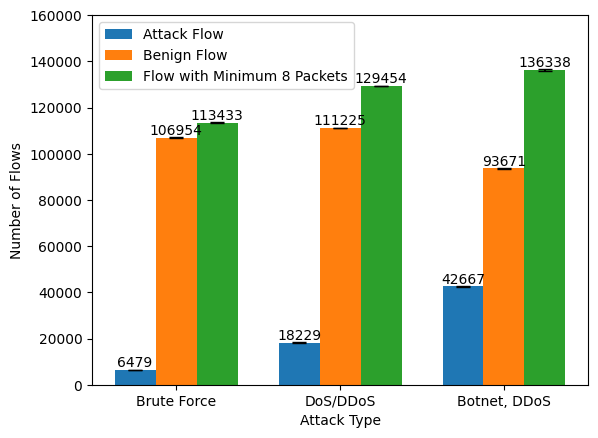

In [2]:
########################## plot avg and std or extracted real flows ##########################
evaluation_fig_gen.plot_avg_std_flow_real(plot_log=False)

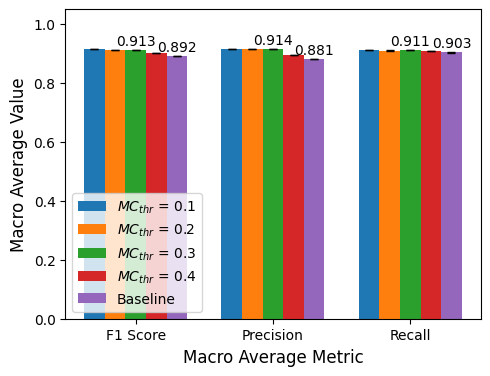

In [2]:
########################## plot gini threshold to macro average values (ensemble, bar) ##########################
evaluation_fig_gen.plot_gini_to_macro_avg_ensemble_bar(ylim_arr=[0, 1.05])

[0.9063203015401059, 0.8380297934247833, 0.9446164475099725]
[0.9050376400318255, 0.8321650457647961, 0.9430986197313272]
[0.9056945403568032, 0.8297358262838127, 0.9460053712662192]
[0.8698591546142055, 0.8227167765448669, 0.9382343402449264]
[0.8454484642631782, 0.8152996945040272, 0.931223079976302]


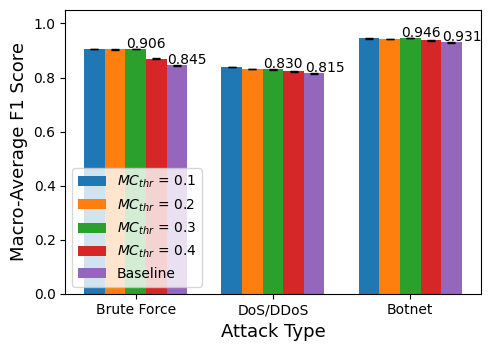

In [2]:
########################## plot a specific macro average metric for each dataset (bar) ##########################
evaluation_fig_gen.plot_gini_to_macro_avg_metric_day_bar(metric="f1", ylim_arr=[0, 1.05])

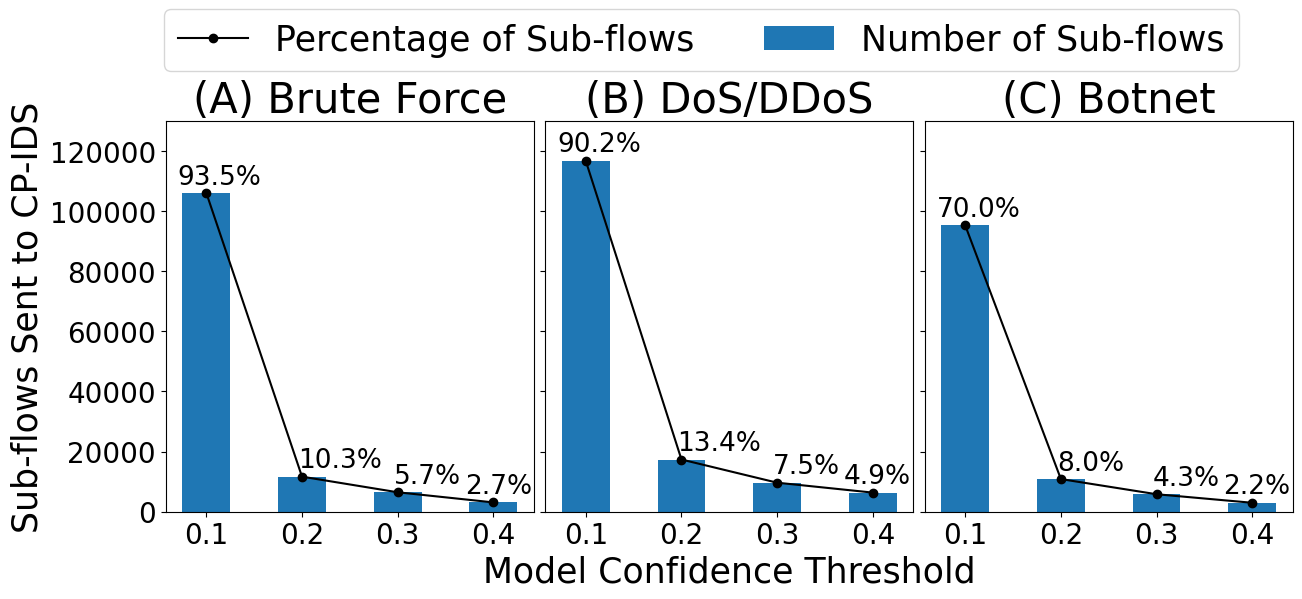

In [4]:
########################## plot number of flows sent to controller ##########################
bbox_pos = (2.96, 1.33)
wspace_val = 0.03
evaluation_fig_gen.plot_gini_to_total_flow_to_controller(wspace_val=wspace_val, bbox_arr=bbox_pos, two_y_axis=False)

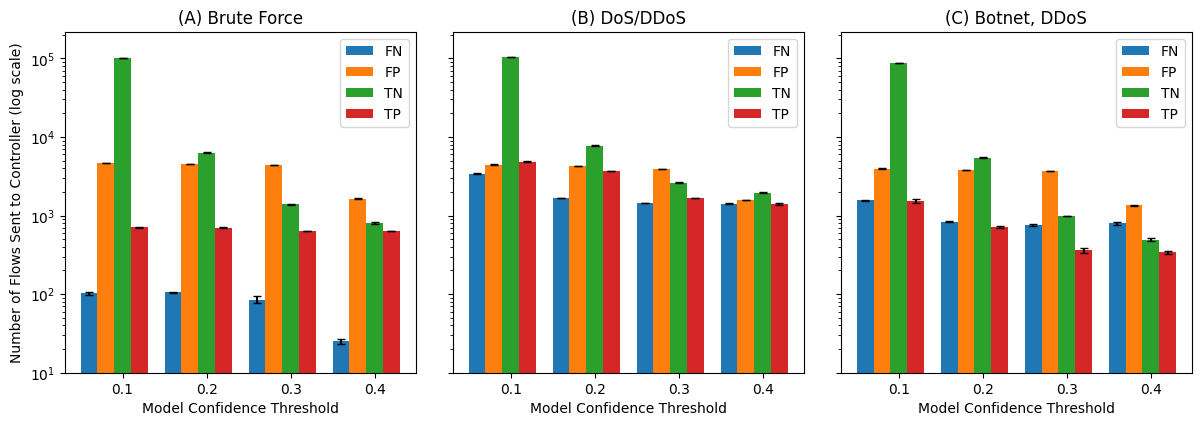

In [2]:
########################## plot confusion matrix of sending to controller (absolute number, bar, log) ##########################
evaluation_fig_gen.plot_gini_to_confusion_matrix_to_controller(with_std=True, with_number=True)

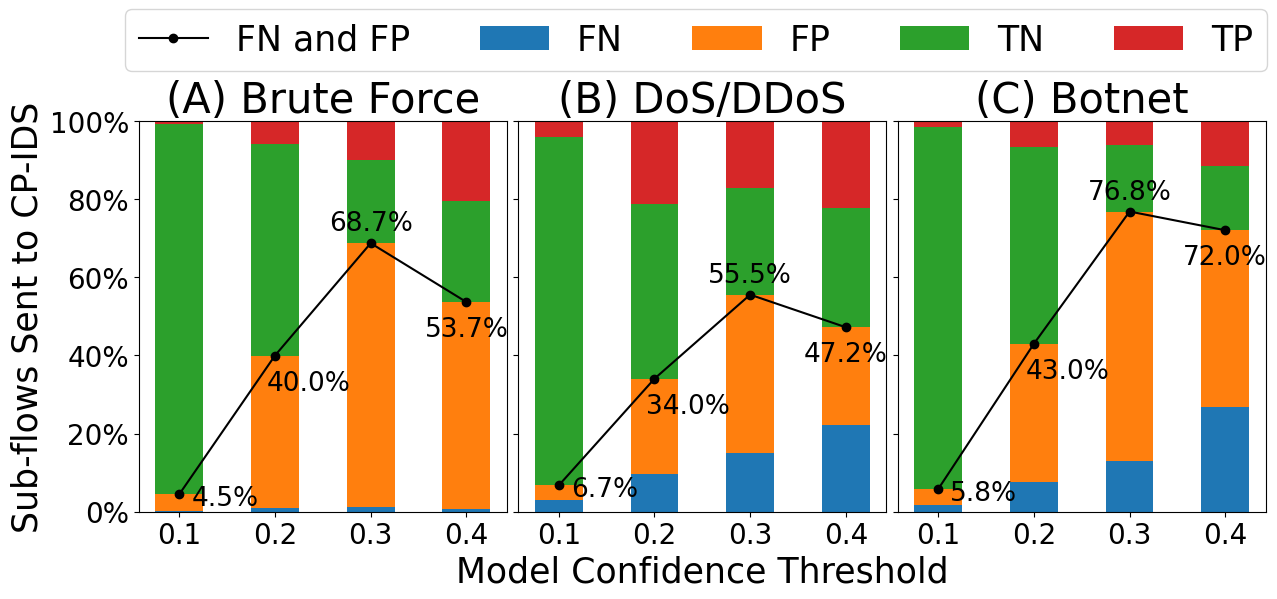

In [2]:
########################## plot confusion matrix of sending to controller (ratio, bar, stacked) ##########################
bbox_pos = (3.11, 1.33)
wspace_val = 0.03
evaluation_fig_gen.plot_gini_to_confusion_matrix_to_controller_ratio_stacked(wspace_val=wspace_val, bbox_arr=bbox_pos)

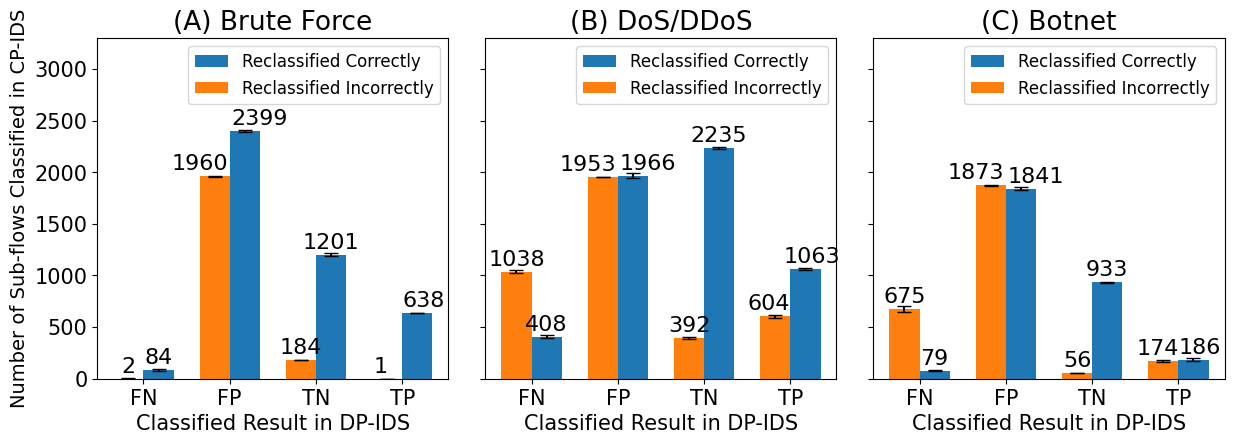

In [2]:
########################## plot classification distribution in controller ##########################
gini_thr = 0.3
evaluation_fig_gen.plot_classification_distribution_controller_day(gini_thr)

In [ ]:
FN
- 0.012936143895273927
- 0.0422058874279601
- 0.013638968481375356
FP
- 0.3709220223676751
- 0.20350622907823446
- 0.3165616045845272

In [ ]:
- 'fn_to_controller': 85.33333333333333
- 'fp_to_controller': 4359.0
- 'flows_to_controller_sum': 6467.666666666667
- 'fn_to_fn_controller': 1.6666666666666667
- 'fn_to_tp_controller': 83.66666666666667
- 'fp_to_fp_controller': 1960.0
- 'fp_to_tn_controller': 2399.0



0.012936143895273927
0.0422058874279601
0.013638968481375356


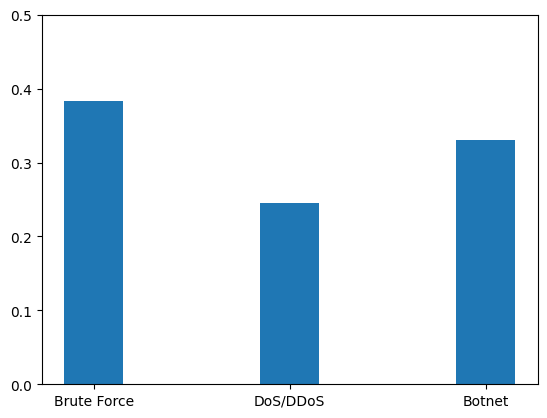

In [2]:
########################## plot reduction of fn and fp ##########################
gini_thr = 0.3
evaluation_fig_gen.plot_reduction_fn_fp(gini_thr)

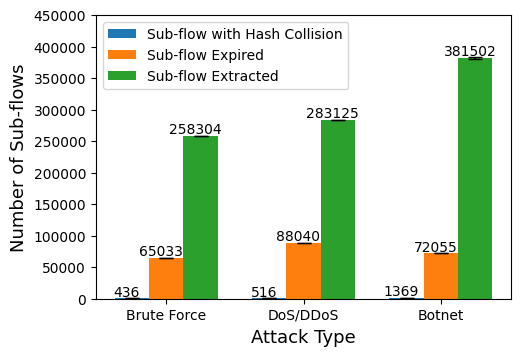

In [5]:
########################## plot expired flows ##########################
evaluation_fig_gen.plot_expired_flows_and_hash_collision(plot_log=False)

In [2]:
classification_time_p4_avg_day_dict, classification_time_controller_avg_day_dict, classification_time_p4_std_day_dict, classification_time_controller_std_day_dict = evaluation_fig_gen.get_classification_time_avg_std()

print(classification_time_p4_avg_day_dict)
print(classification_time_controller_avg_day_dict)
print(classification_time_p4_std_day_dict)
print(classification_time_controller_std_day_dict)

{'tuesday': [0.06697525474050732, 0.07459776561508293, 0.05703409620071493, 0.05659911302167683], 'wednesday': [0.36945253207418927, 0.1150647541019713, 0.12500773774519489, 0.12302301705187373], 'friday': [0.23990010076903193, 0.126354841792324, 0.12211818536553799, 0.1294330534895123]}
{'tuesday': [137.06619669172315, 0.5460030956438522, 0.361365456251941, 0.354334169869378], 'wednesday': [331.7447953927107, 94.2500132374846, 9.16528954238204, 12.630538916942909], 'friday': [74.27883761584944, 0.6147191421659902, 0.3997125236970163, 0.47526219478647497]}
{'tuesday': [0.00044606352052100836, 0.023433532666093077, 0.0010947319262859631, 0.0008514525798323074], 'wednesday': [0.00538187768124071, 0.005742638388039529, 0.0034999262264987802, 0.003966658946231321], 'friday': [0.007191223133974173, 0.0032764983739882398, 0.0005162788535892579, 0.014288546235225161]}
{'tuesday': [61.41698304977077, 0.05040834544281286, 0.04042735332434419, 0.04393368210749458], 'wednesday': [65.3954850396499

In [4]:
def compute_precision(fp, tp):
    pre = tp / (tp + fp)
    return pre

def compute_recall(fn, tp):
    re = tp / (tp + fn)
    return re

def compute_f1(pre, re):
    f1 = (2 * pre * re) / (pre + re)
    return f1


attack_fn = 21 + 4606 + 2859
attack_fp = 4683 + 4849 + 4094
attack_tn = 76774 + 73945 + 62392 + 90000
attack_tp = 6443 + 12176 + 37265

benign_fn = attack_fp
benign_fp = attack_fn
benign_tn = attack_tp
benign_tp = attack_tn

attack_pre = compute_precision(attack_fp, attack_tp)
attack_re = compute_recall(attack_fn, attack_tp)
attack_f1 = compute_f1(attack_pre, attack_re)

benign_pre = compute_precision(benign_fp, benign_tp)
benign_re = compute_recall(benign_fn, benign_tp)
benign_f1 = compute_f1(benign_pre, benign_re)

macro_avg_pre = (attack_pre + benign_pre) / 2
macro_avg_re = (attack_re + benign_re) / 2
macro_avg_f1 = (attack_f1 + benign_f1) / 2

print(macro_avg_pre)
print(macro_avg_re)
print(macro_avg_f1)

0.8899343401699837
0.9194242366248746
0.9037331415330201


In [ ]:
0.8850177333647369
0.9108861667773299
0.8969623233410116

CML
0.913

In [9]:
fn_list = [21, 4606, 2859]
fp_list = [4683, 4849, 4094]
tp_list = [6443, 12176, 37265]

pre_list = []
re_list = []
f1_list = []

for i in range(3):
    pre_list.append(compute_precision(fp_list[i], tp_list[i]))
    re_list.append(compute_recall(fn_list[i], tp_list[i]))
    f1_list.append(compute_f1(pre_list[i], re_list[i]))

print(pre_list)
print(re_list)
print(f1_list)

[0.5790940140212115, 0.7151835535976505, 0.9010130805870548]
[0.9967512376237624, 0.7255392682636158, 0.9287458877479813]
[0.7325753268902786, 0.7203241932144231, 0.9146693175263552]
